# <b>Programming For Data Analysis Assignment</b>
# numpy.random package explored

## Some general requirements as mentioned in videos
Include comparison of PCG64 (new version of seed random generator - https://numpy.org/doc/stable/reference/random/generator.html?highlight=pcg64) vs. Mersenne Twister (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState)

Include explanation of bit generators and generators

In [1]:
#Setup import for remaining notebook
import numpy as np
import matplotlib.pyplot as plt

# 1. Explaining the Overall Purpose of the numpy.random package
## Overview
The <b>numpy.random</b> package allows us to generate pseudo random numbers in Python in a number of different ways, which in turn allows the package to be used for a variety of different functions at its most basic it can give simple random data for adding randomness to some script (like pick a random number from 1 to 10 or set of numbers) or picking a random item from a list, to more complex randomised data for scientific usage like generating a sequence of numbers to represent a type of distibution or picking random samples from a dataset to test and validate a model with.

Numpy as a package in general deals primarily with it's own <i>array</i> data structure (it shares many similarities with Python's native list data structure) and numpy.random generally returns its results as arrays and often expects arrays as one of its inputs, given how arrays work in numpy this means we can return random data in different ways so can get multidimensional or flat arrays.

<code>
1-Dimensional Array - [1 2 3]
2-Dimensional Array - [[1 2 3] 
                       [4 5 6]]
</code>
<br>

The small caveat with the numpy.random package is that the numbers generated are not truly random but are generated based off some seed value, so it merely gives the illusion of randomness, however for most purposes pseudo random is sufficient.
One of the advantages of pseudo random numbers is that by providing the same seed, the output will consistent and in some cases this will be important later if you want to test on a reproducable set of random numbers.

Random Number Generators are how the numpy.random package produces its random numbers, in your function or script you would typically define your random number generator first (perhaps passing it a seed value, to give predictable results) and then picking what generation function and arguments to supply.
See below for a brief example of what this would look like, this well be fleshed out in code cells later with actual examples for Simple Random Data.

```
>>> import numpy as np
>>> rng = np.random.default_rng()
>>> rng.random()
0.04493814959810294
>>> rng.integers(10, size=(4, 5))
array([[0, 3, 7, 1, 7],
       [8, 4, 4, 6, 0],
       [8, 1, 2, 3, 3],
       [1, 7, 3, 5, 6]], dtype=int64)
```

The last thing to consider here is how Generators and Bit Generators interact, the randomness from Generators originates from Bit Generators and when you intialize ``np.random.default_rng()`` or ``np.random.Generator()`` it in turn initializes the Bit Generator, so the two typically work in tandem together with Generator relying on a Bit Generator.

The Bit Generator itself does not directly provide any numbers, instead it manages state, sets the seed and sends back random bits which the Generator interprets as numbers. When no seed value is provided to the Bit Generator it generates a seed from the OS state, alternatively you can provide a seed value as a number or a array of numbers which the Bit Generator will interpret as the seed, it is generally advised to use a 32-bit value as a minimum but in practice you can use as low as 0 (Bit Generators seed values must be positive).

## Functionality within numpy.random
Broadly, the numpy.random package can be broken up in the following categories, which I will start to explore in the ensuing cells:
- <b>Simple Random Data</b>
        - This broadly covers simple random data like a random value between two numbers or random bytes, an array of random numbers, picking between several options like an array of strings or numbers.
- <b>Permutations</b>
        - When you have a preexisting set of values you want to change the order of, a simple example for a real life use for this would be where you want to scramble the results of your dataset for drawing samples.
- <b>Distributions</b>
        - A variety of different randomised distributions such as uniform, normal, exponential, power, logistic etc.

# 2. Simple Random Data

In [2]:
#To start with I will first set up a rng, which will be used throughout the following cells for generating a variety of different random values
rng = np.random.default_rng() #here rondom_num_generator is declared as a default_rng object

In [3]:
print("Random number from 0 to 10 -", rng.integers(10)) #print a single random number from 1 to 10, when a single arg provided it assumes this is the high parameter
print("Array of 5 random numbers between 2 and 10 -", rng.integers(low=2,high=10,size=5)) #print an array of random numbers, this time providing several arguments
print("Array of random numbers up to but not including 2 -", rng.integers(2,size=5)) #print a pseudo binary array of random numbers as it will only return 1's or 0's
print("Multi Dimensional array -",rng.integers(low=2,high=10,size=[2,10])) #print a multidimensional array of random numbers

Random number from 0 to 10 - 5
Array of 5 random numbers between 2 and 10 - [9 2 4 4 9]
Array of random numbers up to but not including 2 - [1 1 1 1 1]
Multi Dimensional array - [[2 9 4 2 6 8 5 2 8 3]
 [7 7 3 4 5 7 5 8 6 8]]


In [4]:
#alternatively using a rng for colour picking
colour_list = ['red', 'green', 'blue']
rng.choice(colour_list)
print(f"randomly picking from colour_list using a random number generator we get - {np.random.choice(colour_list)}, {np.random.choice(colour_list)}, {np.random.choice(colour_list)}")

randomly picking from colour_list using a random number generator we get - blue, blue, red


# 3. Permutations
For permutations in numpy.random we have the functions <b>shuffle</b> and <b>permutation</b>.
<b>Shuffle</b> performs its operation in place, so whatever object you pass into np.random.shuffle() is changed.
<b>Permutation</b> performs its operation on a copy of the object passed to it, so in practice you would set some variable equal to your np.random.permutation() operation to retain it.


See the next cell for an example of both.

In [5]:
#Declare a simple list that is already ordered
my_list = [1,2,3,4,5,6,7,8,9,10]
print("my_list before it is shuffled:",my_list) #print the list
my_permu_list = np.random.permutation(my_list) #perform permutation, assign variable to result
print("my_list after permutation:",my_list) #print original my_list, show it has not changed
print("my_permu_list:", my_permu_list) #print the permutation list
np.random.shuffle(my_list) #perform shuffle on my_list
print("my_list after shuffle:", my_list) #finally show my_list again, now it has changed

my_list before it is shuffled: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_list after permutation: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_permu_list: [ 4  9 10  5  1  8  6  3  2  7]
my_list after shuffle: [4, 1, 6, 8, 5, 9, 10, 3, 2, 7]


# 4. Distributions
With numpy.random.unform it produces a numpy array of numbers, when supplying the arguments below of low=0, high=10 and size=100 this gives us an array of 100 numbers uniformly distributed from 0 to 10.

Below I play around with this and show the larger the array, the more uniform the histogram ends up looking and therefore the more uniform the distribution is.

## Uniform Distribution

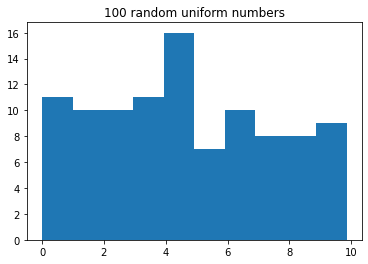

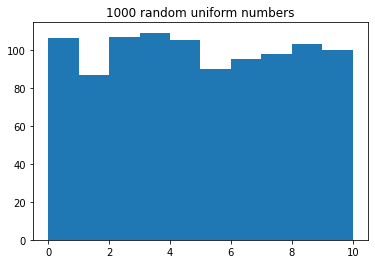

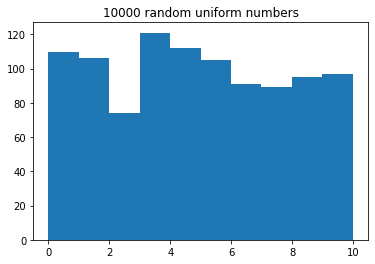

In [6]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
rand_uniform = np.random.uniform(low=0,high=10,size=100)
plt.hist(rand_uniform)
plt.title("100 random uniform numbers")
plt.show()
rand_uniform = np.random.uniform(low=0,high=10,size=1000)
plt.hist(rand_uniform)
plt.title("1000 random uniform numbers")
plt.show()
rand_uniform = np.random.uniform(low=0,high=10,size=1000)
plt.hist(rand_uniform)
plt.title("10000 random uniform numbers")
plt.show()


With numpy.random.normal it produces a numpy array of normal numbers, when supplying the arguments below of loc=10,and size=100 this gives us an array of 100 numbers normally distributed around 10.

Below I play around with this and show the larger the array, the more normal the histogram ends up looking and therefore the more normal the distribution is.
## Normal Distribution

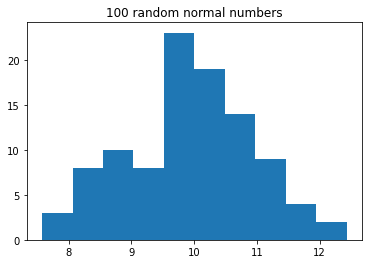

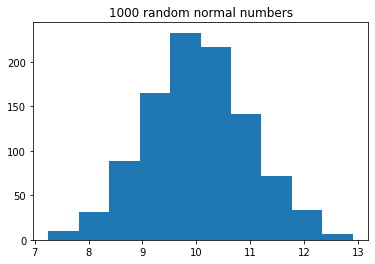

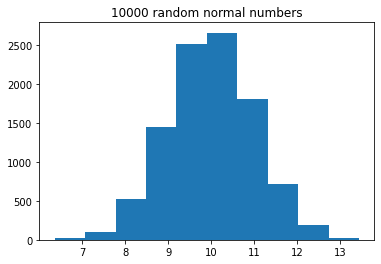

In [7]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
rand_normal = np.random.normal(loc=10,size=100)
plt.hist(rand_normal)
plt.title("100 random normal numbers")
plt.show()
rand_normal = np.random.normal(loc=10,size=1000)
plt.hist(rand_normal)
plt.title("1000 random normal numbers")
plt.show()
rand_normal = np.random.normal(loc=10,size=10000)
plt.hist(rand_normal)
plt.title("10000 random normal numbers")
plt.show()

The above examples demonstrating picking a random choice from a list of given options, producing a uniform distribution or producing a random normal distribution are all applications that have realy world usages, where someone may want to produce a random distribution to test some model or may want a randomised effect to happen when a script is ran

## Binomial Distribution
With the binomial function from default_rng I can get a binomial distribution, where I provide 3 arguments n number of successes, p probability of success, and size the number of trials to run and array that results

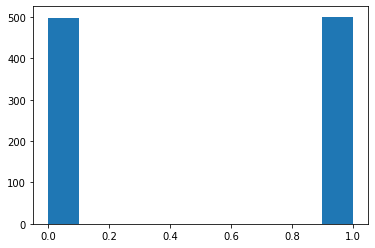

In [8]:
bin_coin_dist = rng.binomial( n=1, p=0.5, size=1000) #distribution for 1 coin flip
plt.hist(bin_coin_dist); #show histogram of distribution

This simple binomial distribution shows when doing a single coin flip 1000 times, you get almost 50% at 0 and 50% at 1, meaning we have 50% chance for having 0 wins or 1 win

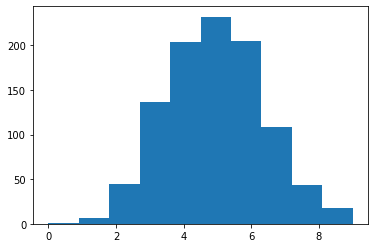

In [9]:
bin_coin_dist = rng.binomial( n=10, p=0.5, size=1000) #distribution for 10 coin flips
plt.hist(bin_coin_dist); #show histogram of distribution

In the next Binomial Distribution I test, when you do 10 coin flips 1000 times what the distribution for wins is, in this case the chance for 0 wins is very low, similarly so for 8 and we have most number of occurences for 5 wins at 250 occurences, this looks very similar to a normal distribution from earlier.

Next I will show an example showing the distribution of values when rolling a dice once and three times over 1000 repeats.


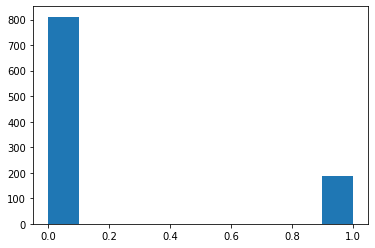

In [10]:
bin_dice_roll = rng.binomial( n=1, p=1/6, size=1000)
plt.hist(bin_dice_roll);

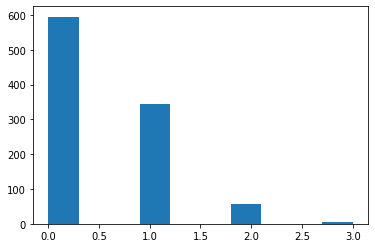

In [11]:
bin_dice_roll = rng.binomial( n=3, p=1/6, size=1000)
plt.hist(bin_dice_roll);

## Exponential Distribution

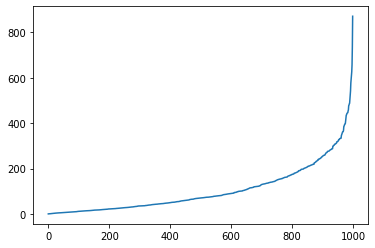

In [12]:
exp_dist_array = rng.exponential(scale=100, size=1000)
exp_dist_array.sort()
plt.plot(exp_dist_array);

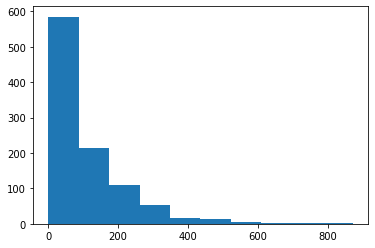

In [13]:
plt.hist(exp_dist_array);

# Power Dsitribution

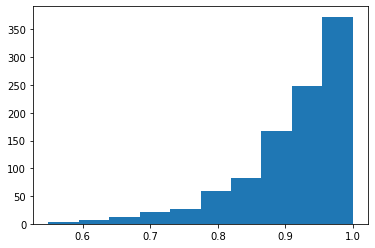

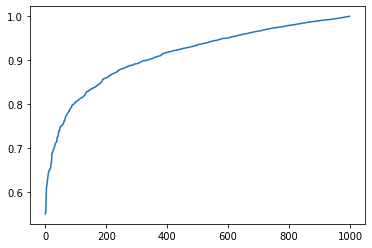

In [15]:
power_dist_array = rng.power(10,1000)
power_dist_array.sort()
plt.hist(power_dist_array)
plt.show()
plt.plot(power_dist_array)
plt.show();

## Logistic Distribution

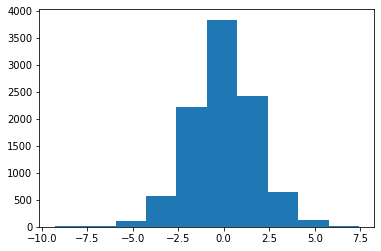

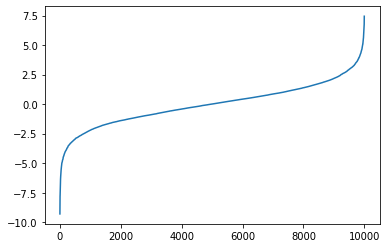

In [20]:
log_dist_array = np.random.default_rng().logistic(loc=0, scale=1, size=10000)
log_dist_array.sort() #sorting the array to do lineplot
plt.hist(log_dist_array)
plt.show();
plt.plot(log_dist_array)

## Laplace Distribution

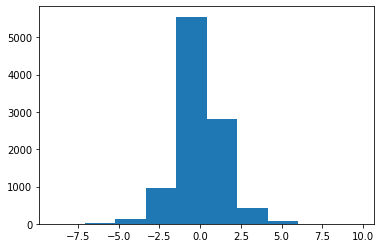

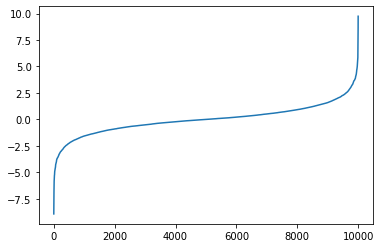

In [25]:
laplace_dist_array = np.random.default_rng().laplace(loc=0, scale=1, size=10000)
laplace_dist_array.sort() #sorting the array to do lineplot
plt.hist(laplace_dist_array)
plt.show();
plt.plot(laplace_dist_array)

# Use of Seeds

## Very Simple example

In [61]:
rng_seeded_1 = np.random.default_rng(1)
print("First loop of five random numbers")
for i in range(5):
    print(rng_seeded_1.random())

rng_seeded_2 = np.random.default_rng(1)
print("\nSecond loop of five random numbers after re-assigning seed value")
for i in range(5):
    print(rng_seeded_2.random())

print("\nFinal loop demonstrates re-assigning seed value as part of loop so we keep getting same random value")
for i in range(5):
    rng_seeded = np.random.default_rng(1)
    print(rng_seeded.random())

First loop of five random numbers
0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545

Second loop of five random numbers after re-assigning seed value
0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545

Final loop demonstrates re-assigning seed value as part of loop so we keep getting same random value
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567


In [62]:
rgb_list = ['red', 'green', 'blue']
rng_seeded_1 = np.random.default_rng(1)
print(f'With seed set to 1, I will always get - {rng_seeded_1.choice(rgb_list)}, {rng_seeded_1.choice(rgb_list)}, {rng_seeded_1.choice(rgb_list)}')
rng_seeded_2 = np.random.default_rng(1)
print(f'Proof - {rng_seeded_2.choice(rgb_list)}, {rng_seeded_2.choice(rgb_list)}, {rng_seeded_2.choice(rgb_list)}')

With seed set to 1, I will always get - green, green, blue
Proof - green, green, blue
